# WHETGEO-2D
## Gembloux Agro-Bio Tech experiment #4

    -Authors: Enrico Borinato, Niccolò Tubini, Riccardo Rigon
    - Licence: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License

----

## Table of Contents

* [Expectations](#Expectations)
* [Meta data](#Meta-data)
* [Reference](#Reference)
* [Computational grid](#Computational-grid)
* [Visualize the output](#Visualize-the-output)
    * [Saturation degree](#Saturation-degree)
    * [Saturation degree gif](#Saturation-degree-gif)



## Expectations
The simulation aims to reproduce the 4th experiment presented in this [video](https://www.youtube.com/watch?v=ego2FkuQwxc) by the [Gembloux Agro-Bio Tech](https://www.gembloux.uliege.be/cms/c_4039827/fr/gembloux-agro-bio-tech).

<figure>
    <center>
    <img src="Figures/Gembloux_Lab_Exp_04.PNG" width="800" height="800/1.618">
    <figcaption>Experiment #4. </figcaption>
    </center>
</figure>



## Meta data

| Data  | Value  |
|:---|:---|
| Model name| WHETGEO-2D |
| Model version  |  v0.9-beta |
| Model reference | Tubini and Rigon (2021) |
| Grid input file | `data/mesh/Gembloux_Lab_exp4_V41.mesh` |
| Boundary condition file | `data/Timeseries/Liege_University/BC_Liege_university_exp4_V41.csv` |
| .sim file | `simulation/WHETGEO2D_Gembloux_Lab_Exp_04_V41.sim` |
| Model runs by | Enrico Borinato |
| Notebook code by | Niccolò Tubini |


## Reference

A. Degr ́e. Water movement in the soil, Last accessed: 27 July 2022. https://www.youtube.com/watch?v=ego2FkuQwxc.

Tubini, N.: Theoretical and numerical tools for studying the Critical Zone from plot to catchments, PhD thesis, University of Trento, 2021.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl # to define new color map
import matplotlib.patches as mpatches
from matplotlib import rc
%matplotlib inline
import matplotlib.style as style 
import matplotlib.colors as colors
import matplotlib.tri as tri
import math
import xarray as xr


import whetgeo2d_mesh 
from whetgeo2d_output import*

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        # Use LaTeX to write all text
        "text.usetex": True, # False
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

plt.rcParams.update(nice_fonts)

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])



In [2]:
project_path = os.path.dirname(os.getcwd())

In [3]:
[triangles, nodes, ID, x_c, y_c] = whetgeo2d_mesh.reconstruct_gmsh_mesh(project_path+"/data/mesh/Gemboloux_Lab_exp4_V41.mesh") 

## Visualize the mesh

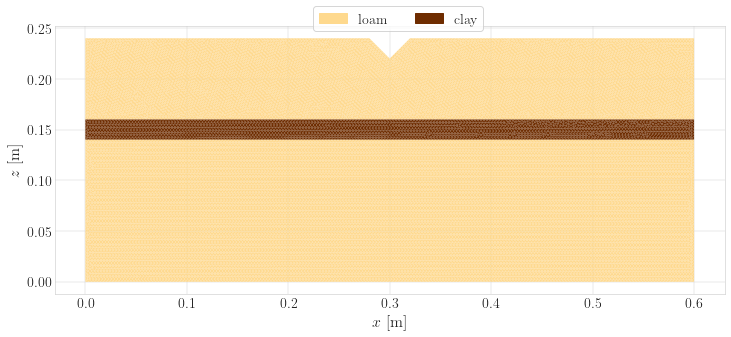

In [5]:
fig, ax = plt.subplots(figsize=(12,12/1.618))
whetgeo2d_mesh.show_domain(ax, nodes, triangles, ID, layer_list=['loam','clay'])
# fig.savefig('Kirkland_et_al_1992_TP1_setup.pdf', format='pdf', bbox_inches='tight')



## Visualize the output

In [6]:
ds = xr.open_dataset(project_path+'/output/Gemboloux_Lab_exp4_V41_0000.nc')


In [7]:

def showMeshPlot(nodes, elements, values):

    y = nodes[:,0]
    z = nodes[:,1]

    def quatplot(y,z, quatrangles, values, ax=None, **kwargs):

        if not ax: ax=plt.gca()
        yz = np.c_[y,z]
        verts= yz[quatrangles]
        pc = matplotlib.collections.PolyCollection(verts, **kwargs)
        pc.set_array(values)
        ax.add_collection(pc)
        ax.autoscale()
        return pc

    
    fig, ax = plt.subplots(figsize=(8, 8))

    ax1 = plt.subplot(541)
    ax1.set_aspect('equal')
    cmap = matplotlib.cm.get_cmap(my_cmap)
    edgecolor = None   

    index = 12
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax1, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.ylabel('$z$ [m]')
    plt.tick_params(axis='both', which='major')
    plt.setp(ax1.get_xticklabels(), visible=False)

    
    
    ax2 = plt.subplot(542)
    ax2.set_aspect('equal')
    
    index = 24
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax2, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.tick_params(axis='both', which='major')
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax2.get_yticklabels(), visible=False)

    
    
    ax3 = plt.subplot(543)
    ax3.set_aspect('equal')
    
    index = 36
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax3, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.tick_params(axis='both', which='major')
    plt.setp(ax3.get_xticklabels(), visible=False)
    plt.setp(ax3.get_yticklabels(), visible=False)

    
    
    ax4 = plt.subplot(544)
    ax4.set_aspect('equal')
    
    index = 48
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax4, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.tick_params(axis='both', which='major')
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax4.get_yticklabels(), visible=False)
    
    
    
    ax5 = plt.subplot(545)
    ax5.set_aspect('equal')
    
    index = 60
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax5, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.ylabel('$z$ [m]')
    plt.tick_params(axis='both', which='major')
    plt.setp(ax5.get_xticklabels(), visible=False)

    
    
    ax6 = plt.subplot(546)
    ax6.set_aspect('equal')
    
    index = 72
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax6, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.tick_params(axis='both', which='major')
    plt.setp(ax6.get_yticklabels(), visible=False)
    plt.setp(ax6.get_xticklabels(), visible=False)

    
    
    ax7 = plt.subplot(547)
    ax7.set_aspect('equal')
    
    index = 84
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax7, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.tick_params(axis='both', which='major')
    plt.setp(ax7.get_yticklabels(), visible=False)
    plt.setp(ax7.get_xticklabels(), visible=False)  
    
    
    ax8 = plt.subplot(548)
    ax8.set_aspect('equal')
    
    index = 96
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax8, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.tick_params(axis='both', which='major')
    plt.setp(ax8.get_xticklabels(), visible=False)
    plt.setp(ax8.get_yticklabels(), visible=False)
    
    
    
    ax9 = plt.subplot(549)
    ax9.set_aspect('equal')
    
    index = 108
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax9, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.ylabel('$z$ [m]')
    plt.tick_params(axis='both', which='major')
    plt.setp(ax9.get_xticklabels(), visible=False)

    
    
    ax10 = plt.subplot(5,4,10)
    ax10.set_aspect('equal')
    
    index = 120
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax10, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.tick_params(axis='both', which='major')
    plt.setp(ax10.get_yticklabels(), visible=False)
    plt.setp(ax10.get_xticklabels(), visible=False)

    
    
    ax11 = plt.subplot(5,4,11)
    ax11.set_aspect('equal')
    
    index = 132
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax11, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.tick_params(axis='both', which='major')
    plt.setp(ax11.get_yticklabels(), visible=False)
    plt.setp(ax11.get_xticklabels(), visible=False)  
    
    
    ax12 = plt.subplot(5,4,12)
    ax12.set_aspect('equal')
    
    index = 144
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax12, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.tick_params(axis='both', which='major')
    plt.setp(ax12.get_xticklabels(), visible=False)
    plt.setp(ax12.get_yticklabels(), visible=False)
    
  
    
    ax13 = plt.subplot(5,4,13)
    ax13.set_aspect('equal')
    
    index = 156
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax13, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.ylabel('$z$ [m]')
    plt.tick_params(axis='both', which='major')
    plt.setp(ax13.get_xticklabels(), visible=False)

    
    
    ax14 = plt.subplot(5,4,14)
    ax14.set_aspect('equal')
    
    index = 168
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax14, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.tick_params(axis='both', which='major')
    plt.setp(ax14.get_yticklabels(), visible=False)
    plt.setp(ax14.get_xticklabels(), visible=False)

    
    
    ax15 = plt.subplot(5,4,15)
    ax15.set_aspect('equal')
    
    index = 180
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax15, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.tick_params(axis='both', which='major')
    plt.setp(ax15.get_yticklabels(), visible=False)
    plt.setp(ax15.get_xticklabels(), visible=False)  
    
    
    ax16 = plt.subplot(5,4,16)
    ax16.set_aspect('equal')
    
    index = 192
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax16, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.tick_params(axis='both', which='major')
    plt.setp(ax16.get_xticklabels(), visible=False)
    plt.setp(ax16.get_yticklabels(), visible=False)
    


    
    ax17 = plt.subplot(5,4,17)
    ax17.set_aspect('equal')
    
    index = 204
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax17, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.ylabel('$z$ [m]')
    plt.xlabel('$x$ [m]')
    plt.tick_params(axis='both', which='major')
    
    
    ax18 = plt.subplot(5,4,18)
    ax18.set_aspect('equal')
    
    index = 216
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax18, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.xlabel('$x$ [m]')
    plt.tick_params(axis='both', which='major')
    plt.setp(ax18.get_yticklabels(), visible=False)

    
    ax19 = plt.subplot(5,4,19)
    ax19.set_aspect('equal')
    
    index = 228
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax19, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.xlabel('$x$ [m]')
    plt.tick_params(axis='both', which='major')
    plt.setp(ax19.get_yticklabels(), visible=False)
    
    
    ax20 = plt.subplot(5,4,20)
    ax20.set_aspect('equal')
    
    index = 240
    pc = quatplot(y,z, np.asarray(elements), ds.saturationDegree.values[index,:], ax=ax20, 
             edgecolor=edgecolor, cmap=cmap, norm=colors.Normalize(vmin=0., vmax=1))
    plt.title( str(ds.time.values[index])[11:16] )
    plt.xlabel('$x$ [m]')
    plt.tick_params(axis='both', which='major')
    plt.setp(ax20.get_yticklabels(), visible=False)


    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.99, 0.1, 0.017, 0.83])
    sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0., vmax=1))
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('$S_e$ [-]', rotation=0, labelpad=10)
    
    fig.tight_layout()
    fig.show()
#     fig.savefig('Exp_3.pdf', dpi=300, bbox_inches='tight')



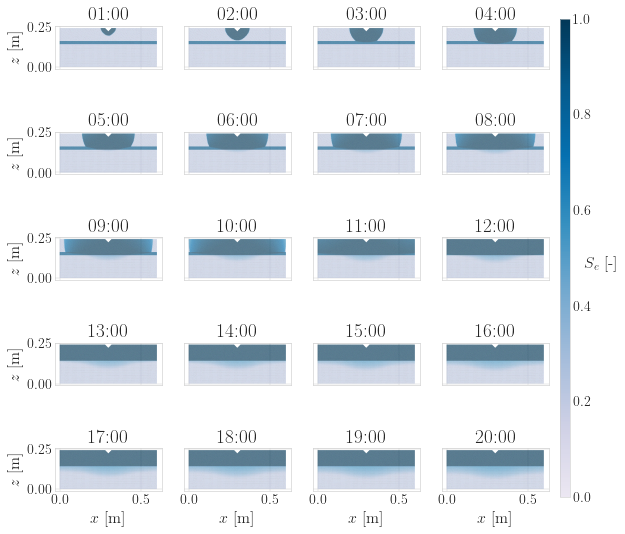

In [8]:
showMeshPlot(nodes, triangles, None)

<img src="Figures/Gembloux_Lab_Exp_04.gif" width="950" align="center">

In [11]:
import shutil
from PIL import Image

%%time
# for t in range(0,len(ds.time.values)):
os.makedirs('temp')
file_names = []
for t in range(0,len(ds.time.values)):
    fig, ax = plt.subplots(figsize=(15,15/1.618))
    ax.set_title('Time ' +(ds.time.values[t]).astype(str)[11:16])
    ax = plot_2D(ax, nodes, triangles, ds.saturationDegree.values[t,:], colorbar_name='$S_e [-]$')
    file_name = 'temp/'+str(t)+'.png'
    file_names.append(file_name)
    fig.savefig(file_name, dpi=400, bbox_inches='tight')
    
frames = [Image.open(f) for f in file_names]
frames[0].save(f"Gembloux_Lab_Exp_04.gif", format="gif", save_all=True, append_images=frames[1:], duration=500, loop=10)
shutil.rmtree('temp')